<a href="https://colab.research.google.com/github/Dhanush-adk/machine_learning/blob/main/assignment_6/assignment_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 1.03 ms (started: 2023-11-30 21:46:36 +00:00)


In [135]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/assignment_2/Housing.csv#'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


time: 139 ms (started: 2023-11-30 21:46:37 +00:00)


In [136]:
df['furnishingstatus'].value_counts().unique
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


time: 12 ms (started: 2023-11-30 21:46:38 +00:00)


In [137]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
df = df.drop('furnishingstatus_semi-furnished', axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0


time: 21 ms (started: 2023-11-30 21:46:39 +00:00)


In [138]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

time: 4.78 ms (started: 2023-11-30 21:46:39 +00:00)


In [139]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


time: 18.3 ms (started: 2023-11-30 21:46:40 +00:00)


In [140]:
df.shape

(545, 14)

time: 5.64 ms (started: 2023-11-30 21:46:40 +00:00)


In [141]:
from sklearn.preprocessing import MinMaxScaler

time: 462 µs (started: 2023-11-30 21:46:40 +00:00)


In [142]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

time: 615 µs (started: 2023-11-30 21:46:41 +00:00)


In [143]:
X = df.drop('price', axis = 1)
y = df[['price']]

time: 3.08 ms (started: 2023-11-30 21:46:42 +00:00)


In [144]:
X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(scaler_y.fit_transform(y), columns=y.columns, index=y.index).values

time: 10.6 ms (started: 2023-11-30 21:46:42 +00:00)


In [145]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(train_X)
y_train =  torch.tensor(train_Y)
X_val =  torch.tensor(val_X)
y_val =  torch.tensor(val_Y)

time: 3.08 ms (started: 2023-11-30 21:46:42 +00:00)


In [150]:
training_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

time: 869 µs (started: 2023-11-30 21:49:05 +00:00)


In [151]:
val_data = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_data, batch_size=32)

time: 814 µs (started: 2023-11-30 21:49:06 +00:00)


In [152]:
def model_train(model, criterion, optimizer, epochs, train_loader, X_val, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            if epoch % 500 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
              loss_val.append(val_loss)
              loss_train.append(loss)
    return loss_train, loss_val

time: 1.13 ms (started: 2023-11-30 21:49:06 +00:00)


#Problem 1.A

In [153]:
# Model 1
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
train_loss, val_loss = model_train(model1, nn.MSELoss(), optimizer1, 5000, train_loader, X_val, y_val)

Epoch 0/5000, Training Loss: 0.052489199178677094, Validation Loss: 0.04280910059436409
Epoch 500/5000, Training Loss: 0.0034495370195921473, Validation Loss: 0.01296891808930557
Epoch 1000/5000, Training Loss: 0.008121290206946158, Validation Loss: 0.013213209054803507
Epoch 1500/5000, Training Loss: 0.003388469529315069, Validation Loss: 0.013132725506851592
Epoch 2000/5000, Training Loss: 0.006650697110254684, Validation Loss: 0.013074980585075007
Epoch 2500/5000, Training Loss: 0.0076236540712722985, Validation Loss: 0.013222919203733802
Epoch 3000/5000, Training Loss: 0.012175554098342754, Validation Loss: 0.012967554224064017
Epoch 3500/5000, Training Loss: 0.011695278724746285, Validation Loss: 0.01307807431664118
Epoch 4000/5000, Training Loss: 0.0053862812997870725, Validation Loss: 0.012990303831912527
Epoch 4500/5000, Training Loss: 0.006384544341369719, Validation Loss: 0.01303786582535361
Epoch 5000/5000, Training Loss: 0.006415388771099638, Validation Loss: 0.013001449998

In [154]:
for name, param in model1.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([1, 32])
Parameter name: 2.bias, Shape: torch.Size([1])
time: 759 µs (started: 2023-11-30 21:50:19 +00:00)


In [155]:
total_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')

Total number of trainable parameters  481 

time: 864 µs (started: 2023-11-30 21:50:19 +00:00)


In [156]:
epochs = range(0, 5001, 500)
epochs

range(0, 5001, 500)

time: 3.31 ms (started: 2023-11-30 21:50:19 +00:00)


<ipython-input-157-34725e8df6cb>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


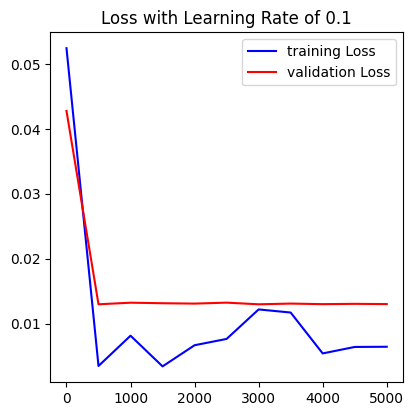

time: 228 ms (started: 2023-11-30 21:50:19 +00:00)


In [157]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.show()

#Problem 1.b

In [158]:
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),  # Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16),  # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criterion = nn.MSELoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
train_loss_2, val_loss_ = model_train(model2, nn.MSELoss(), optimizer2, 5000, train_loader, X_val, y_val)

Epoch 0/5000, Training Loss: 0.07888221895013095, Validation Loss: 0.10151069484320685
Epoch 500/5000, Training Loss: 0.013863988622295122, Validation Loss: 0.013270993390490708
Epoch 1000/5000, Training Loss: 0.006827927256762345, Validation Loss: 0.013494707179058613
Epoch 1500/5000, Training Loss: 0.0032998966538497466, Validation Loss: 0.013697501695962093
Epoch 2000/5000, Training Loss: 0.009231810294018936, Validation Loss: 0.013725983174555903
Epoch 2500/5000, Training Loss: 0.0051228396412052735, Validation Loss: 0.01366625484002429
Epoch 3000/5000, Training Loss: 0.004919163542994459, Validation Loss: 0.013800157009357878
Epoch 3500/5000, Training Loss: 0.008421290659801763, Validation Loss: 0.013732028928964048
Epoch 4000/5000, Training Loss: 0.010208795555430038, Validation Loss: 0.013829586445449987
Epoch 4500/5000, Training Loss: 0.005700810127531355, Validation Loss: 0.013976770697245481
Epoch 5000/5000, Training Loss: 0.006265485132099413, Validation Loss: 0.013809044019

In [159]:
for name, param in model2.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([64, 32])
Parameter name: 2.bias, Shape: torch.Size([64])
Parameter name: 4.weight, Shape: torch.Size([16, 64])
Parameter name: 4.bias, Shape: torch.Size([16])
Parameter name: 6.weight, Shape: torch.Size([1, 16])
Parameter name: 6.bias, Shape: torch.Size([1])
time: 1.06 ms (started: 2023-11-30 21:51:54 +00:00)


In [160]:
total_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')

Total number of trainable parameters  3617 

time: 565 µs (started: 2023-11-30 21:51:54 +00:00)


<ipython-input-161-13cacacf0b85>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


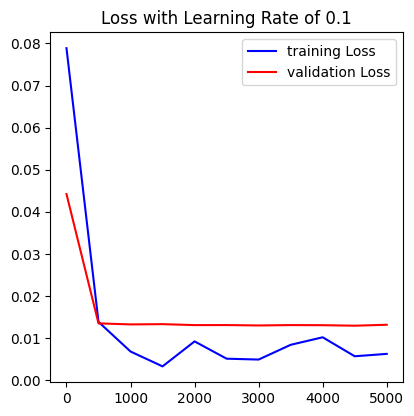

time: 274 ms (started: 2023-11-30 21:51:54 +00:00)


In [161]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_2]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_2]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.show()
